In [17]:
import deepxde as dde
from deepxde.backend import jax
import numpy as np
import torch


def generate_poisson_problem(u_func, k = 3, m = 4):
    """Генерирует f(x, y) и g(x, y) для заданного аналитического решения u(x, y)"""
    def laplacian_u(xy):
        x, y = xy[:, 0:1], xy[:, 1:2]
        u_xx = -k**2 * torch.sin(k * x) * torch.cos(m * y)
        u_yy = -m**2 * torch.sin(k * x) * torch.cos(m * y)
        return -(u_xx + u_yy)
    
    
    f = laplacian_u
    g = lambda xy: u_func(xy[:, 0:1], xy[:, 1:2])
    return f, g

def train_pinn(f, g, limits, N_it=70000):
    
    def poisson_residual(x, u):
        du_xx = dde.grad.hessian(u, x, i=0, j=0)
        du_yy = dde.grad.hessian(u, x, i=1, j=1)
        return du_xx + du_yy + f(x)
    
    def boundary(x, on_boundary):
        return on_boundary
    

    geom = dde.geometry.Rectangle(limits[0],limits[1])
    bc = dde.DirichletBC(geom, g, boundary)
    data = dde.data.PDE(geom, poisson_residual, bc, num_domain=5000, num_boundary=400)
    net = dde.nn.FNN([2] + [50] * 3 + [1], "tanh", "Glorot uniform")
    
    model = dde.Model(data, net)
    model.compile("adam", lr=0.001)
    loss_history, train_state = model.train(iterations=N_it)

    dde.saveplot(loss_history, train_state, issave=True, isplot=True)

    return model, loss_history

Compiling model...
'compile' took 0.000430 s

Training model...

0         [1.09e+00, 3.92e-01]    [1.09e+00, 3.92e-01]    []  
1000      [4.81e-04, 1.74e-04]    [4.81e-04, 1.74e-04]    []  
2000      [2.50e-04, 7.75e-05]    [2.50e-04, 7.75e-05]    []  
3000      [1.49e-04, 4.84e-05]    [1.49e-04, 4.84e-05]    []  
4000      [9.11e-05, 4.61e-05]    [9.11e-05, 4.61e-05]    []  
5000      [6.59e-05, 8.09e-05]    [6.59e-05, 8.09e-05]    []  
6000      [1.37e-04, 5.76e-04]    [1.37e-04, 5.76e-04]    []  
7000      [3.27e-05, 1.19e-05]    [3.27e-05, 1.19e-05]    []  
8000      [2.58e-05, 1.12e-05]    [2.58e-05, 1.12e-05]    []  
9000      [2.03e-05, 1.02e-05]    [2.03e-05, 1.02e-05]    []  
10000     [1.67e-05, 9.19e-06]    [1.67e-05, 9.19e-06]    []  
11000     [5.51e-05, 1.38e-04]    [5.51e-05, 1.38e-04]    []  
12000     [2.43e-05, 1.44e-04]    [2.43e-05, 1.44e-04]    []  
13000     [1.28e-05, 1.29e-05]    [1.28e-05, 1.29e-05]    []  
14000     [9.68e-06, 5.74e-06]    [9.68e-06, 5.74e-06

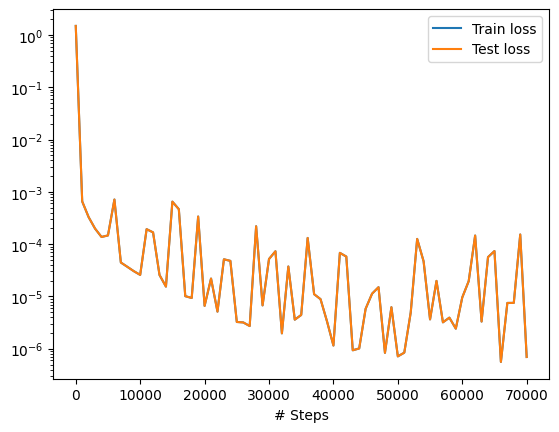

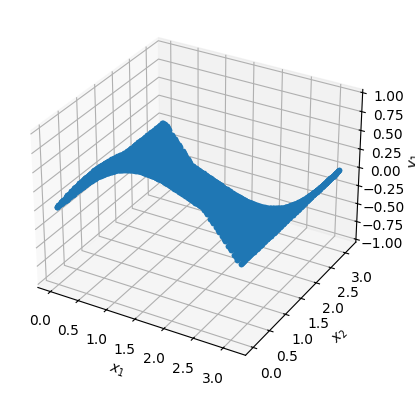

Compiling model...
'compile' took 0.000481 s

Training model...

Step      Train loss              Test loss               Test metric
0         [4.23e+01, 3.22e-01]    [4.23e+01, 3.22e-01]    []  
1000      [3.92e-03, 1.72e-03]    [3.92e-03, 1.72e-03]    []  
2000      [1.08e-03, 3.58e-04]    [1.08e-03, 3.58e-04]    []  
3000      [1.80e-03, 1.59e-04]    [1.80e-03, 1.59e-04]    []  
4000      [1.12e-02, 1.61e-04]    [1.12e-02, 1.61e-04]    []  
5000      [2.54e-04, 7.05e-05]    [2.54e-04, 7.05e-05]    []  
6000      [3.75e-04, 6.53e-05]    [3.75e-04, 6.53e-05]    []  
7000      [4.57e-02, 2.54e-04]    [4.57e-02, 2.54e-04]    []  
8000      [3.23e-04, 4.97e-05]    [3.23e-04, 4.97e-05]    []  
9000      [1.27e-04, 4.49e-05]    [1.27e-04, 4.49e-05]    []  
10000     [2.09e-04, 4.33e-05]    [2.09e-04, 4.33e-05]    []  
11000     [2.18e-04, 4.04e-05]    [2.18e-04, 4.04e-05]    []  
12000     [9.59e-05, 3.84e-05]    [9.59e-05, 3.84e-05]    []  
13000     [2.87e-04, 3.64e-05]    [2.87e-04, 3

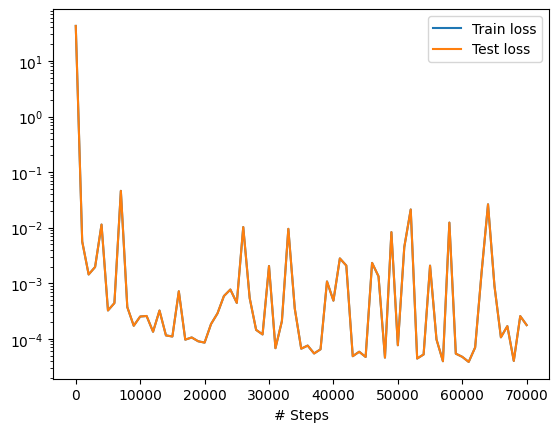

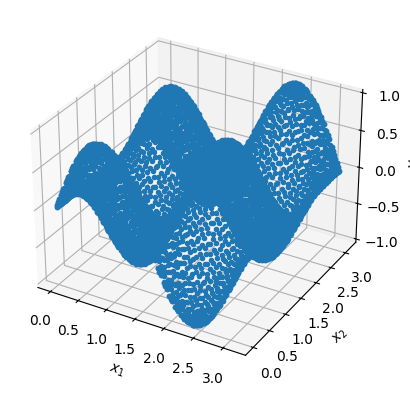

Compiling model...
'compile' took 0.000359 s

Training model...

Step      Train loss              Test loss               Test metric
0         [3.91e+03, 3.92e-01]    [3.91e+03, 3.92e-01]    []  
1000      [1.45e+03, 3.39e+00]    [1.45e+03, 3.39e+00]    []  
2000      [3.75e+01, 1.02e+00]    [3.75e+01, 1.02e+00]    []  
3000      [5.16e+00, 4.95e-01]    [5.16e+00, 4.95e-01]    []  
4000      [2.47e+00, 3.03e-01]    [2.47e+00, 3.03e-01]    []  
5000      [1.50e+00, 1.86e-01]    [1.50e+00, 1.86e-01]    []  
6000      [2.74e+00, 1.55e-01]    [2.74e+00, 1.55e-01]    []  
7000      [8.41e-01, 1.39e-01]    [8.41e-01, 1.39e-01]    []  
8000      [4.96e+00, 1.28e-01]    [4.96e+00, 1.28e-01]    []  
9000      [6.19e-01, 1.21e-01]    [6.19e-01, 1.21e-01]    []  
10000     [5.55e-01, 1.14e-01]    [5.55e-01, 1.14e-01]    []  
11000     [5.07e-01, 1.07e-01]    [5.07e-01, 1.07e-01]    []  
12000     [4.68e-01, 1.02e-01]    [4.68e-01, 1.02e-01]    []  
13000     [4.36e-01, 9.71e-02]    [4.36e-01, 9

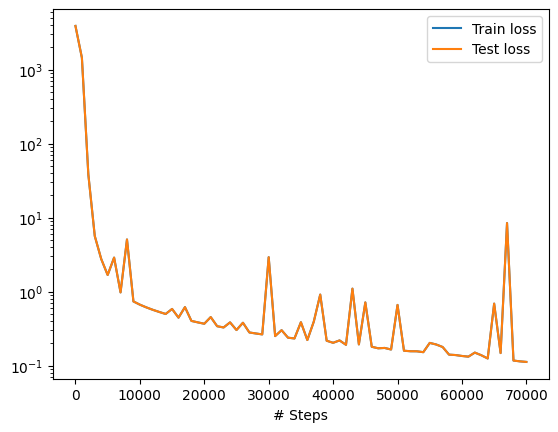

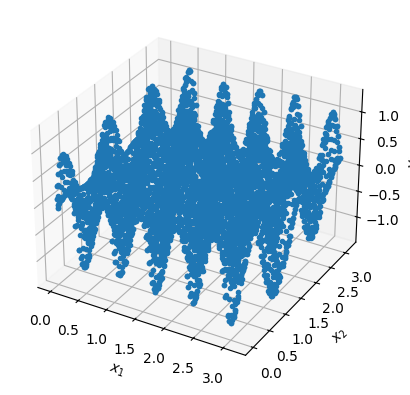

In [ ]:
# Experiment

limits = [[0, 0], [torch.pi, torch.pi]] # [x_min, y_min] , [x_max,y_max]

k = 1
m = 1
u_func = lambda x, y: torch.sin(torch.tensor(k * x)) * torch.cos(torch.tensor(m * y))
f, g = generate_poisson_problem(u_func, k, m)
model_1, loss_history_1 = train_pinn(f, g, limits)

k = 2
m = 3
u_func = lambda x, y: torch.sin(torch.tensor(k * x)) * torch.cos(torch.tensor(m * y))
f, g = generate_poisson_problem(u_func, k, m)
model_2, loss_history_2 = train_pinn(f, g, limits)

k = 10
m = 5
u_func = lambda x, y: torch.sin(torch.tensor(k * x)) * torch.cos(torch.tensor(m * y))
f, g = generate_poisson_problem(u_func, k, m)
model_3, loss_history_3 = train_pinn(f, g, limits)

In [ ]:
# Оценка качества
x_test = np.random.rand(1000, 2) * np.pi
y_exact = u_func(x_test[:, 0:1], x_test[:, 1:2])
y_pred = model_1.predict(x_test)
y_pred = torch.tensor(y_pred, device="cpu").numpy()

l2_abs_error = np.linalg.norm(y_pred - y_exact, 2)
l2_rel_error = l2_abs_error / np.linalg.norm(y_exact, 2)

print(f"Абсолютная L2 ошибка: {l2_abs_error}")
print(f"Относительная L2 ошибка: {l2_rel_error}")

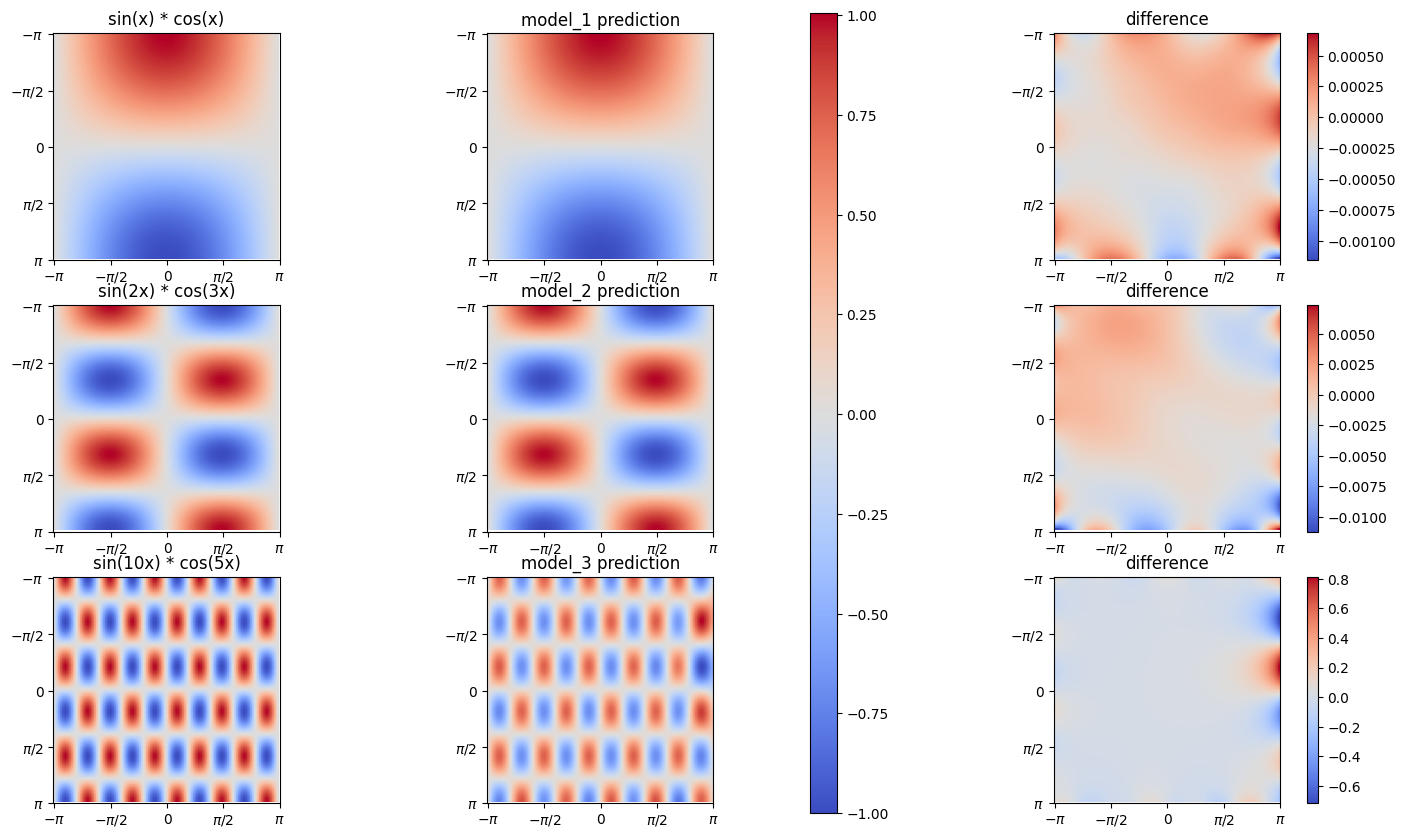

In [35]:
import matplotlib.pyplot as plt

X_partition = 100
Y_partition = 100
left = 0
right = np.pi
a = 1
b = 1
X = np.linspace(left,right,X_partition)
Y = np.linspace(left,right,Y_partition)
x, y = np.meshgrid(X, Y)
grid_points = np.vstack([x.ravel(), y.ravel()]).T 


coef_pairs = [(1, 1), (2, 3), (10, 5)]

z1 = np.sin(1 * x) * np.cos(1 * y)
u1 = model_1.predict(grid_points)
u1 = u1.reshape(X_partition,Y_partition)
dif_1 = z1 - u1

z2 = np.sin(2*x) * np.cos(3*y)
u2 = model_2.predict(grid_points)
u2 = u2.reshape(X_partition,Y_partition)
dif_2 = z2 - u2

z3 = np.sin(10*x) * np.cos(5*y)
u3 = model_3.predict(grid_points)
u3 = u3.reshape(X_partition,Y_partition)
dif_3 = z3 - u3

data_list = [z1, u1, dif_1,
             z2, u2, dif_2,
             z3, u3, dif_3]

ticks_X = np.linspace(0, X_partition, 5)
ticks_Y = np.linspace(0, Y_partition, 5)
tick_labels = [r"$-\pi$", r"$-\pi/2$", "0", r"$\pi/2$", r"$\pi$"]

fig, axes = plt.subplots(3, 3, figsize=(18, 10), gridspec_kw={'width_ratios': [1, 1, 1.5]})
for i, ax in enumerate(axes.flat):
    im = ax.imshow(data_list[i], cmap="coolwarm", vmin=data_list[i].min(), vmax=data_list[i].max())
    ax.set_title(f'{chr(97 + i)})')
    ax.set_xticks(ticks_X)
    ax.set_xticklabels(tick_labels)
    ax.set_yticks(ticks_Y)
    ax.set_yticklabels(tick_labels)
    if(i == 4):
        cbar_ax = fig.add_axes([0.58, 0.1, 0.015, 0.8])
        fig.colorbar(im, cax=cbar_ax)


    if(i%3 == 2):
        fig.colorbar(im, ax=ax) # colorbar для правого столбца

axes[0,0].set_title("sin(x) * cos(x)")
axes[0,1].set_title("model_1 prediction")
axes[0,2].set_title("difference")
axes[1,0].set_title("sin(2x) * cos(3x)")
axes[1,1].set_title("model_2 prediction")
axes[1,2].set_title("difference")
axes[2,0].set_title("sin(10x) * cos(5x)")
axes[2,1].set_title("model_3 prediction")
axes[2,2].set_title("difference")

plt.show()